# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning.
https://en.wikipedia.org/wiki/Iris_flower_data_set

There are 4 features: sepal length, sepal width, petal length, and petal width.

We start by creating 2 clusters. Then standardize the data and try again to check for differences. 

We first start by considering differences in sepals as indicators for each plant and then do the same with differences in petals, which turns out to be more revealing.

We then use the Elbow rule to determine how many clusters are there.


## Import the relevant libraries

In [34]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [35]:
raw_data = pd.read_csv('iris_dataset.csv')
raw_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
raw_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Plot the data

For this exercise, we cluster the iris flowers by the shape of their sepal. 


In [37]:
sepal_data = raw_data.copy()
sepal_data = sepal_data.iloc[:,0:2] #We just use the columns related to the sepal
sepal_data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


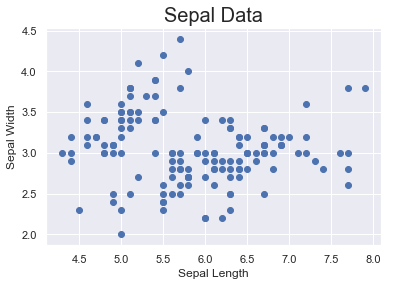

In [38]:
x1 = sepal_data['sepal_length']
y = sepal_data['sepal_width']
plt.scatter(x1,y)
plt.title('Sepal Data',fontsize = 20)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Clustering (unscaled data)

Now we separate the original data into 2 clusters.

In [39]:
x = raw_data.copy()
kmeans = KMeans(2)
kmeans.fit(x) #We train the model prior to using the predict method

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
identified_clusters = raw_data.copy()
identified_clusters = kmeans.fit_predict(x) #Compute cluster centers and predict cluster index for each sample 
identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [41]:
new_data = raw_data.copy()
new_data['clusters'] = identified_clusters #We add a column with the clusters previously predicted
new_data.head()

,sepal_length,sepal_width,petal_length,petal_width,clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Text(0.5, 1.0, 'Unscaled Sepal Data')

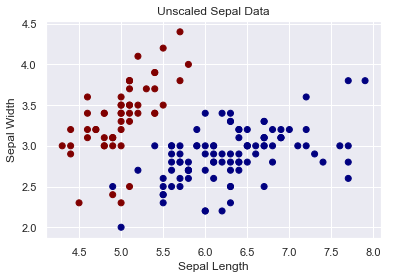

In [42]:
plt.scatter(new_data['sepal_length'],
            new_data['sepal_width'],c = new_data['clusters'],cmap = 'jet')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Unscaled Sepal Data')

# Standardize the variables

We now import and use the preprocessing function from sklearn to standardize the data. 

In [43]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(raw_data)
#x_scaled.round(3)

# Clustering (scaled data)

In [44]:
kmeans = KMeans(2)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
clusters_scaled = raw_data.copy()
clusters_scaled['clusters prediction'] = kmeans.fit_predict(x_scaled)
clusters_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,clusters prediction
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


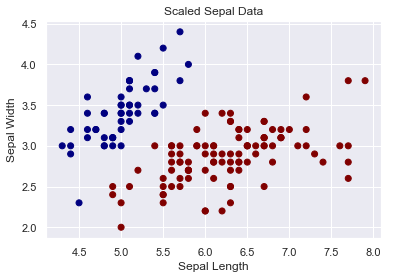

In [46]:
plt.scatter(clusters_scaled['sepal_length'],
           clusters_scaled['sepal_width'],
           c = clusters_scaled['clusters prediction'],cmap = 'jet')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scaled Sepal Data')
plt.show()

Results for both scaled and unscaled data are very similar because the data for both sepal length and sepal width do not differ much. This can be checked in the min and max values for for length and width in the .describe() line above.

## Elbow Method

### WCSS

In [47]:
wcss = [] #empty list where results for the loop below will be appended

for i in range(1,10): #In essence this loop performs the kmeans clustering as before in a certain range
    kmeans = KMeans(i)
    kmeans.fit_predict(x_scaled)
    wcss.append(kmeans.inertia_) 
#.inertia is the sum of squared distances of samples to their closest cluster center
    

In [48]:
wcss #within-cluster sums of squares

[600.0,
 223.73200573676345,
 140.96837895511078,
 114.38954350297054,
 91.00244098567248,
 80.21212041228328,
 72.40842367152962,
 64.17537241568641,
 54.984195886297464]

### The Elbow Method

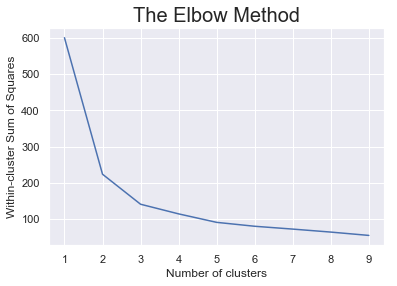

In [49]:
cl_num = np.arange(1,10)
plt.plot(cl_num,wcss)
plt.title('The Elbow Method',fontsize = 20)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

##### It seems 2-3 clusters are the best options. 5 looks like an option too.

## 2 clusters 
Just as before...


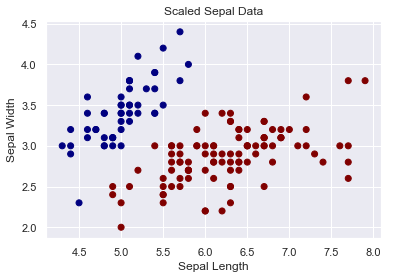

In [50]:
plt.scatter(clusters_scaled['sepal_length'],
           clusters_scaled['sepal_width'],
           c = clusters_scaled['clusters prediction'],cmap = 'jet')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scaled Sepal Data')
plt.show()


## 3 Clusters

In [51]:
kmeans3 = KMeans(3)
kmeans3.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
clusters_scaled3 = raw_data.copy()
clusters_scaled3['clusters prediction'] = kmeans3.fit_predict(x_scaled)
#clusters_scaled.head()

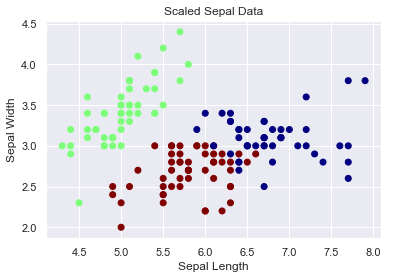

In [53]:
plt.scatter(clusters_scaled3['sepal_length'],
           clusters_scaled3['sepal_width'],
           c = clusters_scaled3['clusters prediction'],cmap = 'jet')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scaled Sepal Data')
plt.show()

## 5 Clusters

In [54]:
kmeans5 = KMeans(5)
kmeans5.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
clusters_scaled5 = raw_data.copy()
clusters_scaled5['clusters prediction'] = kmeans5.fit_predict(x_scaled)
#clusters_scaled.head()

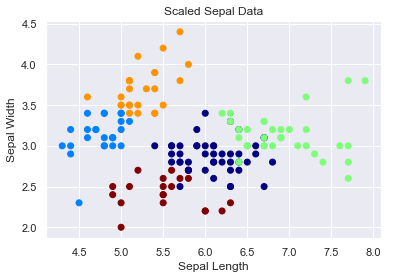

In [56]:
plt.scatter(clusters_scaled5['sepal_length'],
           clusters_scaled5['sepal_width'],
           c = clusters_scaled5['clusters prediction'],cmap = 'jet')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scaled Sepal Data')
plt.show()

## Solutions comparison with the original iris dataset



Obviously there are only 3 types, because that's the original (truthful) iris dataset.



In [57]:
data_answers = pd.read_csv('iris_with_answers.csv')
data_answers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
data_answers.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [59]:
data_answers['species'].unique() #.unique to check the types of species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [60]:
data_answers['species'] = data_answers['species'].map({'setosa':0,'versicolor':1,'virginica':2})
data_answers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Final Scatter Plots


## Real Data

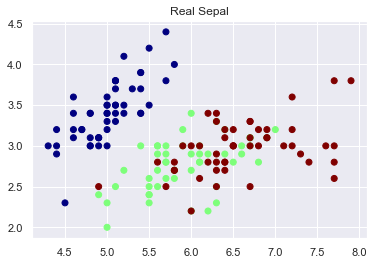

In [61]:
plt.scatter(data_answers['sepal_length'],
           data_answers['sepal_width'],
           c = data_answers['species'], cmap = 'jet')
plt.title('Real Sepal')
plt.show()

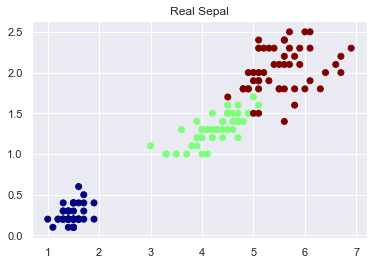

In [62]:
plt.scatter(data_answers['petal_length'],
           data_answers['petal_width'],
           c = data_answers['species'], cmap = 'jet')
plt.title('Real Sepal')
plt.show()

It seems what makes a difference is the variation in petals and not in sepals

## Our clustering

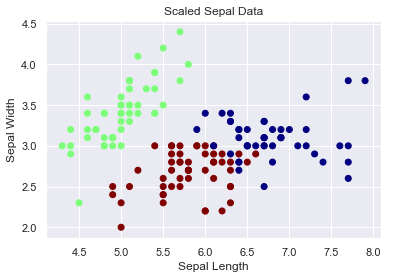

In [63]:
plt.scatter(clusters_scaled3['sepal_length'],
           clusters_scaled3['sepal_width'],
           c = clusters_scaled3['clusters prediction'],cmap = 'jet')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scaled Sepal Data')
plt.show()

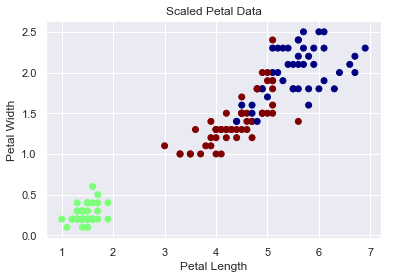

In [64]:
plt.scatter(clusters_scaled3['petal_length'],
           clusters_scaled3['petal_width'],
           c = clusters_scaled3['clusters prediction'],cmap = 'jet')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scaled Petal Data')
plt.show()